In [1]:
!git clone https://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [2]:
import pandas as pd
df = pd.read_csv('/content/data/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# 데이터 잘라주기
X = df.iloc[:, 0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [4]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


## model checkpoint

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = "{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, verbose=1)

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# validation_split => 검증셋으로 한 결과값도 같이 보여줌
history=model.fit(X_train, y_train, epochs=50, batch_size=500, 
                  validation_split=0.25, verbose =0, callbacks = [checkpointer])

score=model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

NameError: ignored

## 그래프 표현

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
# 데이터 잘라주기
X = df.iloc[:, 0:12]
y = df.iloc[:,12]

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 1s 35ms/step - loss: 0.7488 - accuracy: 0.7724 - val_loss: 0.4693 - val_accuracy: 0.8038
Epoch 2/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.3563 - accuracy: 0.8432 - val_loss: 0.3634 - val_accuracy: 0.8900
Epoch 3/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.3480 - accuracy: 0.9066 - val_loss: 0.3340 - val_accuracy: 0.8946
Epoch 4/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.2907 - accuracy: 0.9120 - val_loss: 0.2733 - val_accuracy: 0.8885
Epoch 5/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.2442 - accuracy: 0.9081 - val_loss: 0.2312 - val_accuracy: 0.9192
Epoch 6/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.2071 - accuracy: 0.9392 - val_loss: 0.2150 - val_accuracy: 0.9262
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1931 - accuracy: 0.9346 - val_loss: 0.2074 - val_accuracy: 0.9292
Epoch 8/2000
8/8 [=

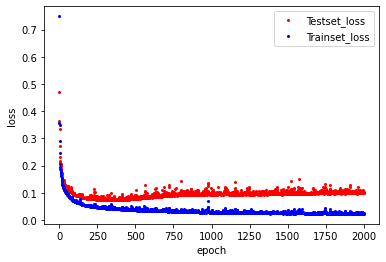

In [12]:
hist_df = pd.DataFrame(history.history)
hist_df

y_vloss = hist_df['val_loss']

y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c='red', markersize=2, label = 'Testset_loss')
plt.plot(x_len, y_loss, "o", c='blue', markersize=2, label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [16]:
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.023356,0.993841,0.096903,0.986923
1,0.021794,0.993841,0.101195,0.986923
2,0.020907,0.994098,0.096673,0.988462
3,0.020726,0.995638,0.106053,0.985385
4,0.021757,0.994868,0.113855,0.985385
...,...,...,...,...
1995,0.010700,0.997691,0.126687,0.988462
1996,0.010723,0.997691,0.125880,0.988462
1997,0.010249,0.997691,0.126686,0.986154
1998,0.010349,0.997691,0.128230,0.988462


## 학습의 자동 중단

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=20)

modelpath = "./data/model/Ch14-4-bestmodel.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss',
verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                    validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 1s 32ms/step - loss: 0.0254 - accuracy: 0.9941 - val_loss: 0.1894 - val_accuracy: 0.9892
Epoch 2/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.1814 - val_accuracy: 0.9823
Epoch 3/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.1720 - val_accuracy: 0.9862
Epoch 4/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0077 - accuracy: 0.9982 - val_loss: 0.1635 - val_accuracy: 0.9869
Epoch 5/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.9982 - val_loss: 0.1567 - val_accuracy: 0.9846
Epoch 6/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.1653 - val_accuracy: 0.9846
Epoch 7/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.1618 - val_accuracy: 0.9854
Epoch 8/2000
8/8